# Create graphs from packager and audio analyser execution times

This document is used to create graphs from the execution times of the packager and the audio analyser, thay have been collected during the execution of the tests both enabling (`-n auto` pytest-xdist option) and disabling parallelization.
"setup" is the stage where the AIM is run, "execution" is the stage where the tests are ran, "teardown" is the stage where setup and execution files are deleted.
Parallelization only affects execution time.
Tests are run on 2 tapes' files.
Time is measured in seconds.

My machine is a laptop with an Intel Core i7-1165G7 CPU, 16 GB of RAM DDR4 at 3200 Mhz and Windows 11.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
WORKING_DIR = "C:/Users/alber/Desktop/Tesi triennale/Tesi/Notebooks/res/"
pkg_timings_path = WORKING_DIR + "pkg_timings.json"
aa_timings_path = WORKING_DIR + "aa_timings.json"

In [3]:
with open(pkg_timings_path, "r") as f:
    pkg_timings = json.load(f)
with open(aa_timings_path, "r") as f:
    aa_timings = json.load(f)

In [4]:
def get_time_list(stage, timings_json, mode=None):
    if not mode:
        return [time[stage] for time in timings_json]
    else:
        is_parallel = True if mode == "parallel" else False
        return [time[stage] for time in timings_json if time["is_parallel"] == is_parallel]

def get_avg_time(stage, timings_json, mode=None):
    time_list = get_time_list(stage, timings_json, mode)
    return sum(time_list) / len(time_list)

## Packager

### Average times

In [5]:
packager_avg_setup_times = get_avg_time("setup", pkg_timings)
packager_avg_execution_times = get_avg_time("execution", pkg_timings)
packager_avg_teardown_times = get_avg_time("teardown", pkg_timings)
print("Packager average setup time: " + str(packager_avg_setup_times))
print("Packager average execution time: " + str(packager_avg_execution_times))
print("Packager average teardown time: " + str(packager_avg_teardown_times))
print("Packager average total time: " + str(packager_avg_setup_times + packager_avg_execution_times + packager_avg_teardown_times))

Packager average setup time: 75.18850028514862
Packager average execution time: 96.91573510169982
Packager average teardown time: 0.05890190601348877
Packager average total time: 172.16313729286193


In [6]:
packager_avg_setup_times_sequential = get_avg_time("setup", pkg_timings, "sequential")
packager_avg_execution_times_sequential = get_avg_time("execution", pkg_timings, "sequential")
packager_avg_teardown_times_sequential = get_avg_time("teardown", pkg_timings, "sequential")
print("Packager average setup time without parallelization: " + str(packager_avg_setup_times_sequential))
print("Packager average execution time without parallelization: " + str(packager_avg_execution_times_sequential))
print("Packager average teardown time without parallelization: " + str(packager_avg_teardown_times_sequential))
print("Packager average total time without parallelization: " + str(packager_avg_setup_times_sequential + packager_avg_execution_times_sequential + packager_avg_teardown_times_sequential))

Packager average setup time without parallelization: 77.08214983940124
Packager average execution time without parallelization: 103.35862598419189
Packager average teardown time without parallelization: 0.08742547035217285
Packager average total time without parallelization: 180.5282012939453


In [7]:
packager_avg_setup_times_parallel = get_avg_time("setup", pkg_timings, "parallel")
packager_avg_execution_times_parallel = get_avg_time("execution", pkg_timings, "parallel")
packager_avg_teardown_times_parallel = get_avg_time("teardown", pkg_timings, "parallel")
print("Packager average setup time with parallelization: " + str(packager_avg_setup_times_parallel))
print("Packager average execution time with parallelization: " + str(packager_avg_execution_times_parallel))
print("Packager average teardown time with parallelization: " + str(packager_avg_teardown_times_parallel))
print("Packager average total time with parallelization: " + str(packager_avg_setup_times_parallel + packager_avg_execution_times_parallel + packager_avg_teardown_times_parallel))

Packager average setup time with parallelization: 73.294850730896
Packager average execution time with parallelization: 90.47284421920776
Packager average teardown time with parallelization: 0.030378341674804688
Packager average total time with parallelization: 163.79807329177856


### Graph of average times, sequential vs parallel, split by stage

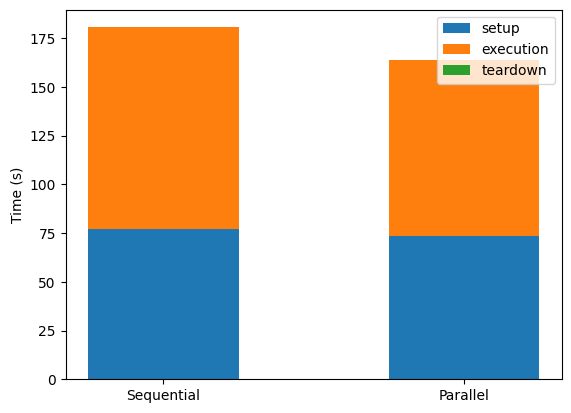

In [8]:
modes = (
    "Sequential",
    "Parallel",
)
stages = {
    "setup": np.array([packager_avg_setup_times_sequential, packager_avg_setup_times_parallel]),
    "execution": np.array([packager_avg_execution_times_sequential, packager_avg_execution_times_parallel]),
    "teardown": np.array([packager_avg_teardown_times_sequential, packager_avg_teardown_times_parallel]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for stage_name, stage_times in stages.items():
    p = ax.bar(modes, stage_times, width, label=stage_name, bottom=bottom)
    bottom += stage_times

ax.set(ylabel="Time (s)")

ax.legend(loc="upper right")

plt.show()

Setup is a very relevant part of the used time, sequential execution seems faster than parallel execution, but the difference is not relevant.

### Scatter plot of execution times, sequential vs parallel

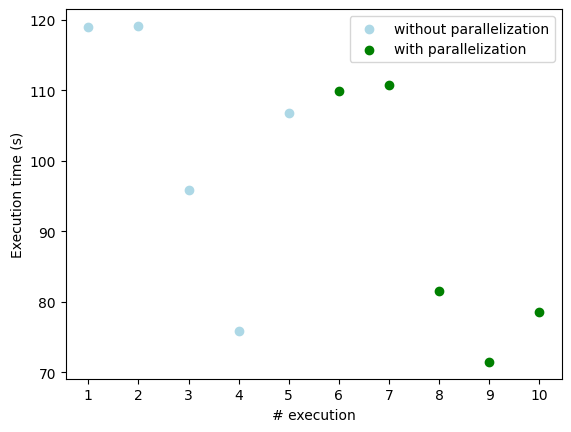

In [9]:
fig, ax = plt.subplots()

time_list_sequential = get_time_list("execution", pkg_timings, "sequential")
executions_sequential = np.arange(1, len(time_list_sequential) + 1)
ax.scatter(executions_sequential, time_list_sequential, c='lightblue', label="without parallelization")


time_list_parallel = get_time_list("execution", pkg_timings, "parallel")
executions_parallel = np.arange(1, len(time_list_parallel) + 1) + max(executions_sequential)
ax.scatter(executions_parallel, time_list_parallel, c='green', label="with parallelization")

ax.set(xticks=np.arange(1, max(executions_parallel) + 1, 1))
ax.legend(loc="upper right")

ax.set(xlabel="# execution", ylabel="Execution time (s)")

plt.show()

Parallelization seems to slightly speed up the execution of the packager's conformance tests, but nothing relevant.

## Audio Analyzer

### Average times

In [10]:
audioanalyser_avg_setup_times = get_avg_time("setup", aa_timings)
audioanalyser_avg_execution_times = get_avg_time("execution", aa_timings)
audioanalyser_avg_teardown_times = get_avg_time("teardown", aa_timings)
print("Audio Analyser average setup time: " + str(audioanalyser_avg_setup_times))
print("Audio Analyser average execution time: " + str(audioanalyser_avg_execution_times))
print("Audio Analyser average teardown time: " + str(audioanalyser_avg_teardown_times))
print("Audio Analyser average total time: " + str(audioanalyser_avg_setup_times + audioanalyser_avg_execution_times + audioanalyser_avg_teardown_times))

Audio Analyser average setup time: 322.1233165760835
Audio Analyser average execution time: 1.3213631411393483
Audio Analyser average teardown time: 0.07450194160143535
Audio Analyser average total time: 323.51918165882427


In [11]:
audioanalyser_avg_setup_times_sequential = get_avg_time("setup", aa_timings, "sequential")
audioanalyser_avg_execution_times_sequential = get_avg_time("execution", aa_timings, "sequential")
audioanalyser_avg_teardown_times_sequential = get_avg_time("teardown", aa_timings, "sequential")
print("Audio Analyser average setup time without parallelization: " + str(audioanalyser_avg_setup_times_sequential))
print("Audio Analyser average execution time without parallelization: " + str(audioanalyser_avg_execution_times_sequential))
print("Audio Analyser average teardown time without parallelization: " + str(audioanalyser_avg_teardown_times_sequential))
print("Audio Analyser average total time without parallelization: " + str(audioanalyser_avg_setup_times_sequential + audioanalyser_avg_execution_times_sequential + audioanalyser_avg_teardown_times_sequential))

Audio Analyser average setup time without parallelization: 322.35967911206757
Audio Analyser average execution time without parallelization: 0.8632075603191669
Audio Analyser average teardown time without parallelization: 0.06297703889700082
Audio Analyser average total time without parallelization: 323.2858637112837


In [12]:
audioanalyser_avg_setup_times_parallel = get_avg_time("setup", aa_timings, "parallel")
audioanalyser_avg_execution_times_parallel = get_avg_time("execution", aa_timings, "parallel")
audioanalyser_avg_teardown_times_parallel = get_avg_time("teardown", aa_timings, "parallel")
print("Audio Analyser average setup time with parallelization: " + str(audioanalyser_avg_setup_times_parallel))
print("Audio Analyser average execution time with parallelization: " + str(audioanalyser_avg_execution_times_parallel))
print("Audio Analyser average teardown time with parallelization: " + str(audioanalyser_avg_teardown_times_parallel))
print("Audio Analyser average total time with parallelization: " + str(audioanalyser_avg_setup_times_parallel + audioanalyser_avg_execution_times_parallel + audioanalyser_avg_teardown_times_parallel))

Audio Analyser average setup time with parallelization: 321.8439790335569
Audio Analyser average execution time with parallelization: 1.8628197366541082
Audio Analyser average teardown time with parallelization: 0.08812228116122159
Audio Analyser average total time with parallelization: 323.7949210513722


### Graph of average times, sequential vs parallel, split by stage

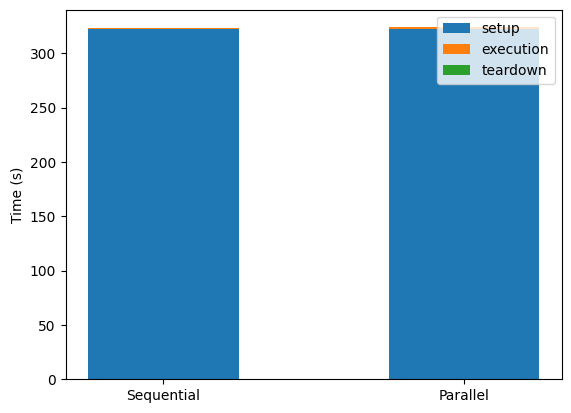

In [13]:
modes = (
    "Sequential",
    "Parallel",
)
stages = {
    "setup": np.array([audioanalyser_avg_setup_times_sequential, audioanalyser_avg_setup_times_parallel]),
    "execution": np.array([audioanalyser_avg_execution_times_sequential, audioanalyser_avg_execution_times_parallel]),
    "teardown": np.array([audioanalyser_avg_teardown_times_sequential, audioanalyser_avg_teardown_times_parallel]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for stage_name, stage_times in stages.items():
    p = ax.bar(modes, stage_times, width, label=stage_name, bottom=bottom)
    bottom += stage_times

ax.set(ylabel="Time (s)")

ax.legend(loc="upper right")

plt.show()

Setup is near to 100% of the used time, no difference is visible between sequential and parallel execution.

### Scatter plot of execution times, sequential vs parallel

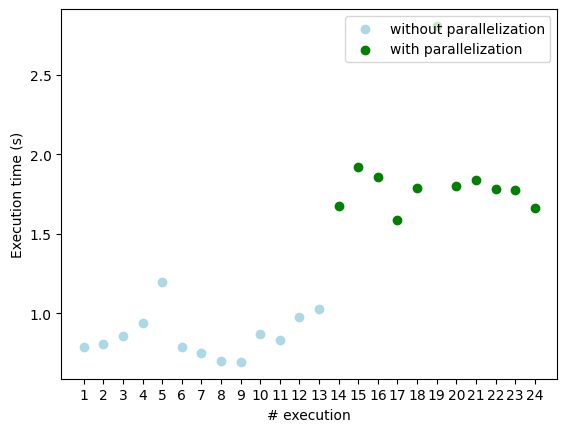

In [14]:
fig, ax = plt.subplots()

time_list_sequential = get_time_list("execution", aa_timings, "sequential")
executions_sequential = np.arange(1, len(time_list_sequential) + 1)
ax.scatter(executions_sequential, time_list_sequential, c='lightblue', label="without parallelization")

time_list_parallel = get_time_list("execution", aa_timings, "parallel")
executions_parallel = np.arange(1, len(time_list_parallel) + 1) + max(executions_sequential)
ax.scatter(executions_parallel, time_list_parallel, c='green', label="with parallelization")

ax.set(xticks=np.arange(1, max(executions_parallel) + 1, 1))
ax.legend(loc="upper right")

ax.set(xlabel="# execution", ylabel="Execution time (s)")

plt.show()

Parallelization slows down the execution of the audio analyser's conformance tests, this is because the spawn of the workers is probably occupying a lot of time relative to the execution time of the tests (~1.5 s).

# Conclusions

Parallelization does not bring a relevant speedup to the execution of the conformance tests, so it is better to disable it to leave other cores free to be used.